# P5: Convolutioneel Neuraal Netwerk

# Data Augmentation

In [1]:
import tensorflow.keras.datasets.cifar10 as cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Hieronder wordt de data al genormaliseerd, anders gaat het plotten van de geaugmenteerde data mis.

In [2]:
# Normalize the data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

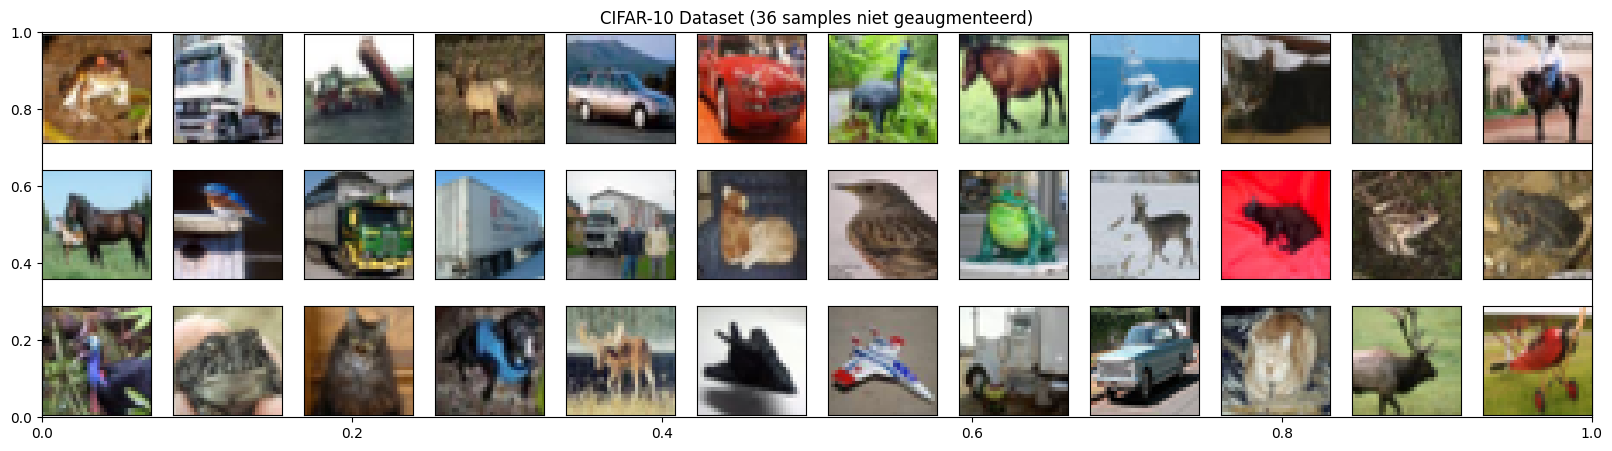

In [3]:
fig = plt.figure(figsize=(20, 5))
plt.title('CIFAR-10 Dataset (36 samples niet geaugmenteerd)')
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
plt.show()

Hieronder wordt een image processing generator aangemaakt en toegepast. Bron: https://www.tensorflow.org/tutorials/images/classification

Dit doe ik om de training data meer willekeur te geven en het model breder toepasbaar te maken, met een hogere accuracy als gevolg.

c:\Users\Marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


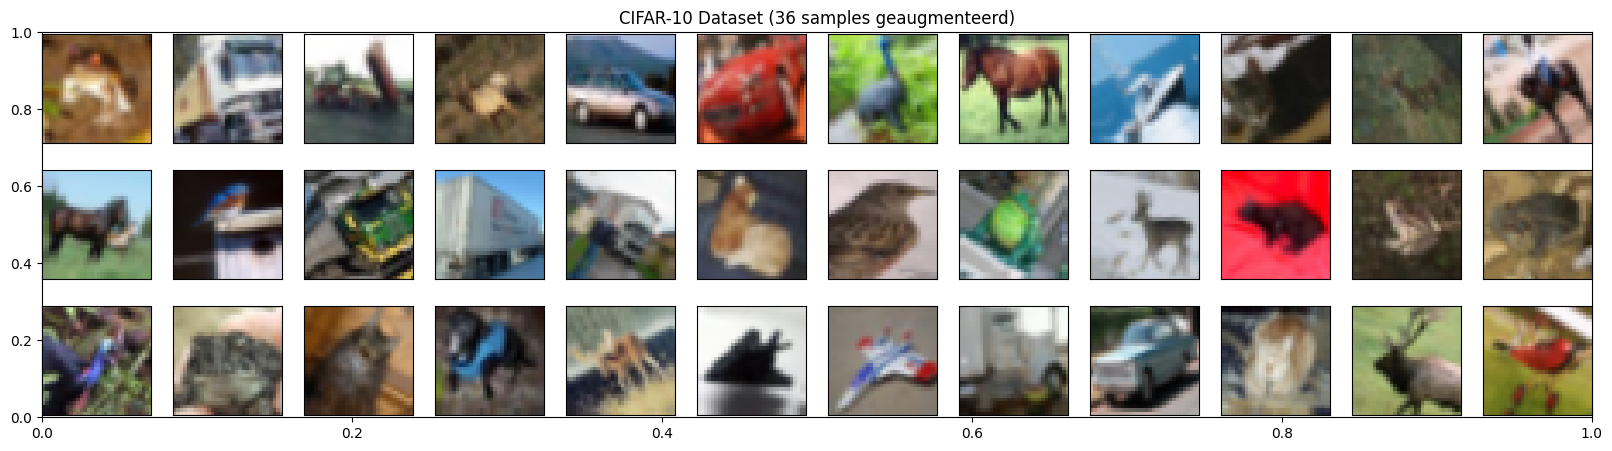

In [4]:
data_augmentation = Sequential(
    [
        RandomFlip("horizontal", input_shape=(32, 32, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1)
    ]
)

fig = plt.figure(figsize=(20, 5))
plt.title('CIFAR-10 Dataset (36 samples geaugmenteerd)')
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(data_augmentation(x_train[i].reshape(1, 32, 32, 3))[0])


# Data preperation
De data is al genormaliseerd, nu nog dummies van targets maken.

In [5]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Modeling

Het architectuur van het model is gebaseerd op die van https://devashree-madhugiri.medium.com/using-cnn-for-image-classification-on-cifar-10-dataset-7803d9f3b983.

Mijn beargumentatie van de keuze is dan ook: het werkt volgens de site erg goed en in de praktijk werkt het hier dus ook goed. Waarom? Geen idee, ik wil gewoon dit vak afsluiten.

In [6]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test), shuffle=True)

c:\Users\Marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3248 - loss: 1.8326 - val_accuracy: 0.4894 - val_loss: 1.4145
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4665 - loss: 1.4765 - val_accuracy: 0.5467 - val_loss: 1.2489
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5078 - loss: 1.3774 - val_accuracy: 0.5834 - val_loss: 1.2040
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5281 - loss: 1.3253 - val_accuracy: 0.5751 - val_loss: 1.1835
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5479 - loss: 1.2722 - val_accuracy: 0.5962 - val_loss: 1.1520
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5632 - loss: 1.2326 - val_accuracy: 0.6046 - val_loss: 1.1248
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5713 - loss: 1.2105 - val_accuracy: 0.6134 - val_loss: 1.0945
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5760 -

# Evaluation

In [7]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6807 - loss: 0.9413

 Test accuracy: 0.6743999719619751


# Conclusie

Na 30 epochs is er een training accuracy bereikt van __0.66__ en een training accuracy van __0.67__. Dit laat ook gelijk al zien dat het model niet overfit is, want de testset scoort ongeveer even goed als de trainset.

De kwaliteit van dit model is oké. Het kan natuurlijk beter, maar ik wil op dit moment focussen op de opdracht van een ander vak, dus ik heb geen zin om er nog meer moeite in te stoppen.